## Mushroom Classification
## Author: Mrinal Kanti Sikdar

# Importing necessary libraries

In [14]:
import numpy as np
from numpy import array 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pydotplus
import os
sns.set()

!pip install autoimpute  #package for handling missing data
from autoimpute.imputations import SingleImputer, MultipleImputer
from autoimpute.imputations.series import MultinomialLogisticImputer

from sklearn import preprocessing as pp
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder # for converting categorical data to numerical data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Preliminary data exploration

In [15]:
data= pd.read_csv("mushrooms.csv")

In [16]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
data.info() # none of the columns are numerical. All columns are catagorical.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [18]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [19]:
data.shape

(8124, 23)

In [20]:
data['class'].unique()

array(['p', 'e'], dtype=object)

# Checking for missing values

In [21]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

This shows that there are no missing values in the dataset. But on close inspection, however in the data description we find that the missing values have been replaced by '?'. We have to handle it by replacing them with numpy "nan".

In [22]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [23]:
for cols in data.columns:
  unique_values= data[cols].unique()
  print (cols,'  =  ', unique_values)

class   =   ['p' 'e']
cap-shape   =   ['x' 'b' 's' 'f' 'k' 'c']
cap-surface   =   ['s' 'y' 'f' 'g']
cap-color   =   ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises   =   ['t' 'f']
odor   =   ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment   =   ['f' 'a']
gill-spacing   =   ['c' 'w']
gill-size   =   ['n' 'b']
gill-color   =   ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape   =   ['e' 't']
stalk-root   =   ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring   =   ['s' 'f' 'k' 'y']
stalk-surface-below-ring   =   ['s' 'f' 'y' 'k']
stalk-color-above-ring   =   ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring   =   ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type   =   ['p']
veil-color   =   ['w' 'n' 'o' 'y']
ring-number   =   ['o' 't' 'n']
ring-type   =   ['p' 'e' 'l' 'f' 'n']
spore-print-color   =   ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population   =   ['s' 'n' 'a' 'v' 'y' 'c']
habitat   =   ['u' 'g' 'm' 'd' 'p' 'w' 'l']


stalk-root column has some nan entries.

In [24]:
# finding the columns having '?' as data
for cols in data.columns:
    counts= data[cols][data[cols]=='?'].count()
    print(cols,'  =  ', counts)

class   =   0
cap-shape   =   0
cap-surface   =   0
cap-color   =   0
bruises   =   0
odor   =   0
gill-attachment   =   0
gill-spacing   =   0
gill-size   =   0
gill-color   =   0
stalk-shape   =   0
stalk-root   =   2480
stalk-surface-above-ring   =   0
stalk-surface-below-ring   =   0
stalk-color-above-ring   =   0
stalk-color-below-ring   =   0
veil-type   =   0
veil-color   =   0
ring-number   =   0
ring-type   =   0
spore-print-color   =   0
population   =   0
habitat   =   0


In [25]:
# finding the columns having '?' as data
for cols in data.columns:
    counts= data[cols][data[cols]=='?'].count()
    if counts != 0:
        print(cols,'  =  ', counts)

stalk-root   =   2480


In [ ]:
# replacing the datapoints having '?' as data with numpy "nan"
data["stalk-root"]= data["stalk-root"].replace('?', np.nan)

In [27]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

# Dropping unnecessary features

In [28]:
# finding the number of unique values in each column
for cols in data.columns:
    print(cols, data[cols].nunique())

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-type 1
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


veil-type column has only one unique value, so it is not going to contribute towards classification, drop it.

In [29]:
data= data.drop(['veil-type'], axis=1) # dropping veil-type

In [30]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Impute missing values using autoimputer package- single imputer

In [31]:
impute= SingleImputer(strategy= 'categorical') 
# since all our columns are catagorical, the mode value will be imputed

In [32]:
impute.fit(data)

SingleImputer(strategy='categorical')

In [33]:
new_data= impute.transform(data)

In [34]:
new_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [35]:
new_data.isnull().sum()  # again checking missing values after imputing

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

there are no more missing values, next step is to encode the catagorical values

In [36]:
# again finding the number of unique values in each column in the new data
for cols in new_data.columns:
    print(cols, data[cols].nunique())

class 2
cap-shape 6
cap-surface 4
cap-color 10
bruises 2
odor 9
gill-attachment 2
gill-spacing 2
gill-size 2
gill-color 12
stalk-shape 2
stalk-root 4
stalk-surface-above-ring 4
stalk-surface-below-ring 4
stalk-color-above-ring 9
stalk-color-below-ring 9
veil-color 4
ring-number 3
ring-type 5
spore-print-color 9
population 6
habitat 7


all the columns above have more than one unique values


# Checking if our dataset is balanced

<Axes: xlabel='class', ylabel='count'>

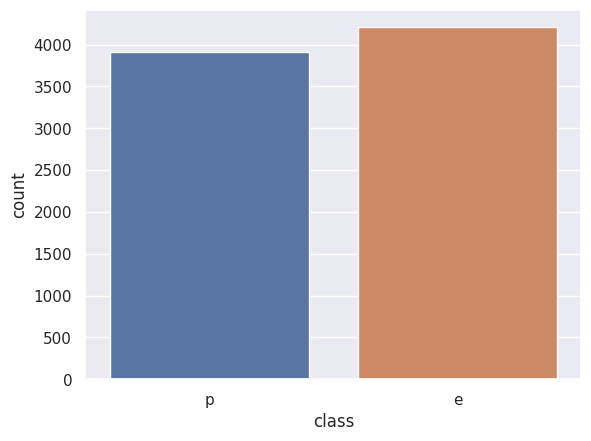

In [37]:
sns.countplot(x=new_data["class"]) # the dataset is quite balanced

In [38]:
# k-mean clustering, kneed

# Next we have to convert all the catagorical values to numerical values

In [39]:
# new_data["class"]= new_data["class"].map({"p": 0, "e": 1})

In [40]:
label_encode= LabelEncoder() # creating an object of LabelEncoder() module
for cols in new_data.columns:
  new_data[cols]= label_encode.fit_transform(new_data[cols]) # encoding each column values

In [41]:
new_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# Looking for correlation between variables

<Axes: >

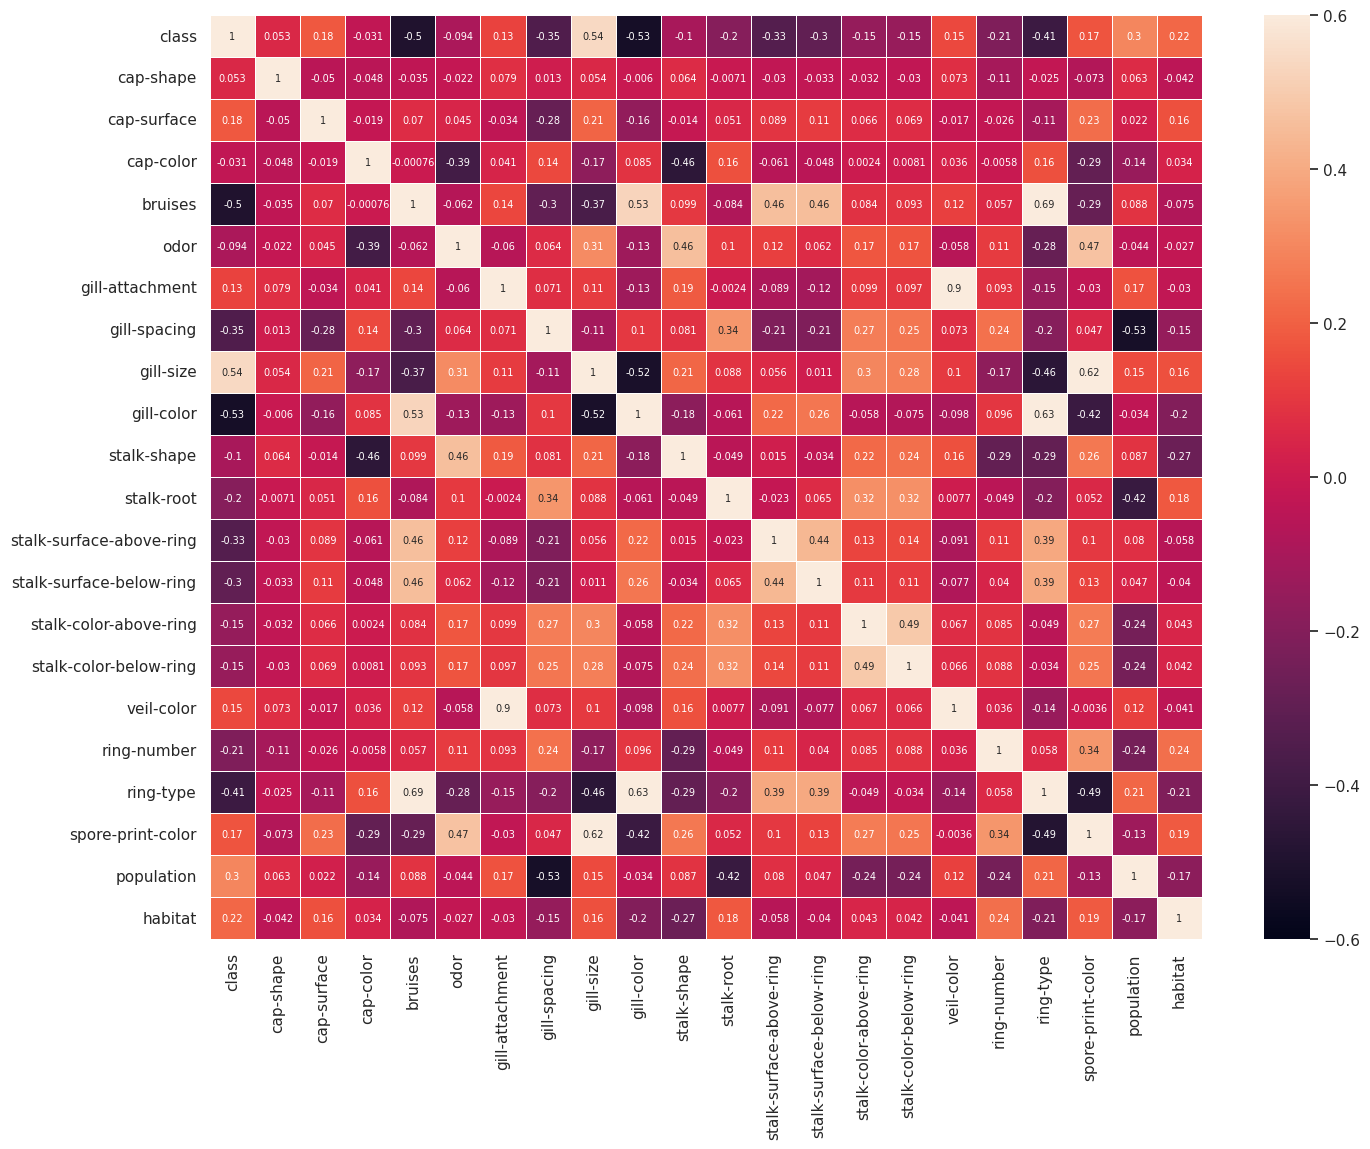

In [42]:
plt.figure(figsize=(16,12))
sns.heatmap(new_data.corr(), vmin=-.6, vmax=.6, linewidths=.5, annot=True, annot_kws={"size": 7})
# features having the most correlation with the target: 'class' are: cap-shape= 0.53, bruises= -0.5, gill-size= 0.54, gill-color= -0.53  
# also gill-attachment and veil-color are highly correlated with value 0.9

Chi2 test for catagorical data

In [43]:
# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0
resultant = pd.DataFrame(data=[(0 for i in range(len(new_data.columns))) for i in range(len(new_data.columns))], 
                         columns=list(new_data.columns))
resultant.set_index(pd.Index(list(new_data.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(new_data.columns):
    for j in list(new_data.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(new_data[i]).reshape(-1, 1), np.array(new_data[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

                                  class      cap-shape    cap-surface  \
class                      0.000000e+00   8.556939e-53   3.768215e-35   
cap-shape                  2.860465e-05   0.000000e+00   4.135643e-07   
cap-surface                1.779362e-48   2.628409e-38   0.000000e+00   
cap-color                  6.917135e-04  1.307768e-197   1.772850e-03   
bruises                   1.069037e-261   6.393462e-65   1.804534e-18   
odor                       2.968682e-18  3.469009e-116   6.341809e-13   
gill-attachment            6.116734e-02   4.105554e-01   2.514887e-02   
gill-spacing              8.061293e-182   1.163205e-08  1.366893e-168   
gill-size                  0.000000e+00  1.219319e-143   2.733002e-93   
gill-color                 0.000000e+00   0.000000e+00  5.785403e-220   
stalk-shape                1.454709e-09   1.594896e-69   7.124699e-05   
stalk-root                 2.453389e-97   1.123649e-24   2.585875e-59   
stalk-surface-above-ring   2.022392e-50   2.188808e

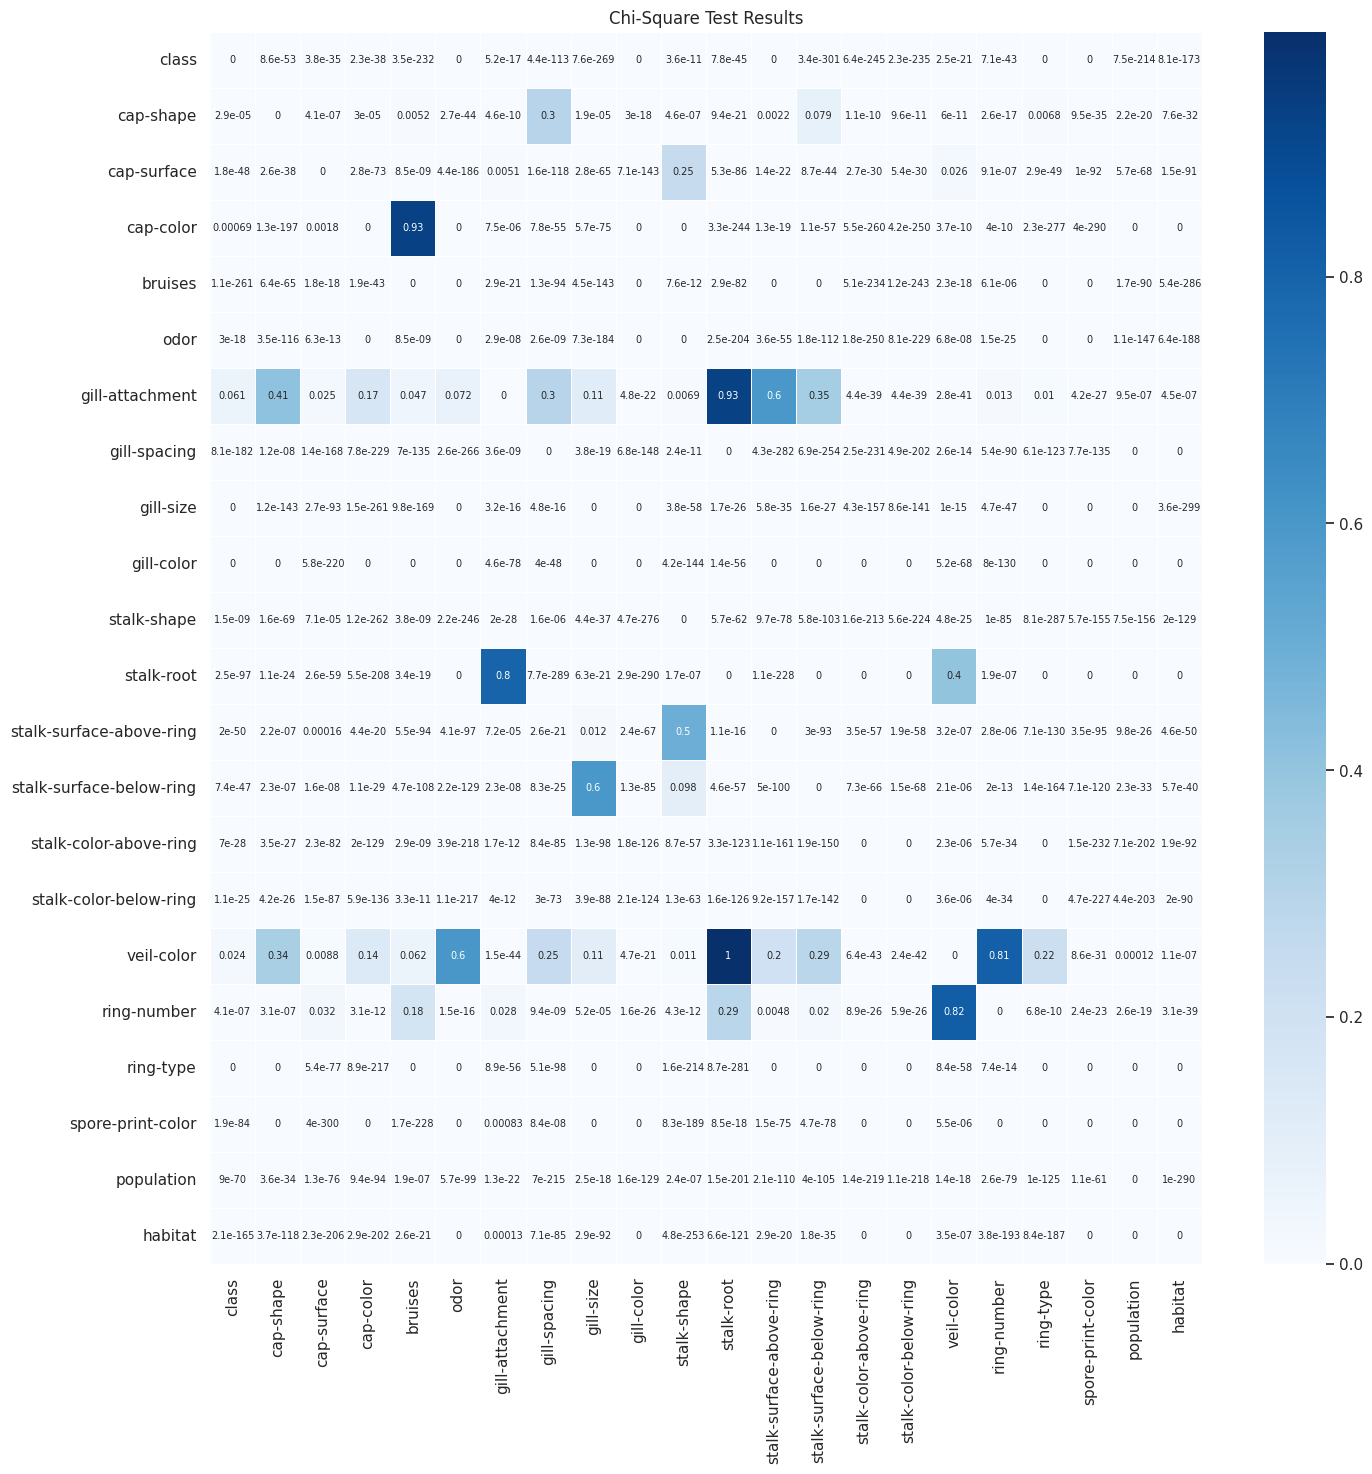

In [44]:
# Plotting a heatmap
fig = plt.figure(figsize=(16,16))
sns.heatmap(resultant, cmap='Blues', linewidths=.5, annot=True, annot_kws={"size": 7})
plt.title('Chi-Square Test Results')
plt.show()

# train_test_split of the data

In [45]:
X = new_data.drop(['class'], axis=1)  
y = new_data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Selecting the best features for our model:
##### using SelectKBest method with score_func as chi2

In [46]:
select = SelectKBest(score_func=chi2, k =12)
fs= select.fit_transform(X_train, y_train) # fitting & transorming train data
print("After selecting best 12 features:", fs.shape)

After selecting best 12 features: (6499, 12)


We've selected 12 best features in x data. To identify the selected features we use get_support() function and filter out them from the features name list.  The fs object contains selected x data. 

In [47]:
filter = select.get_support()
filter

array([False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True])

In [48]:
filter = select.get_support()
features = array(X_train.columns)
 
print("All features:")
print(features)
print("                               ") 
print("Selected best 12:")
print(features[filter])

All features:
['cap-shape' 'cap-surface' 'cap-color' 'bruises' 'odor' 'gill-attachment'
 'gill-spacing' 'gill-size' 'gill-color' 'stalk-shape' 'stalk-root'
 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'stalk-color-above-ring' 'stalk-color-below-ring' 'veil-color'
 'ring-number' 'ring-type' 'spore-print-color' 'population' 'habitat']
                               
Selected best 12:
['cap-surface' 'bruises' 'gill-spacing' 'gill-size' 'gill-color'
 'stalk-root' 'stalk-surface-above-ring' 'stalk-surface-below-ring'
 'ring-type' 'spore-print-color' 'population' 'habitat']


In [49]:
X_train_new= X_train[features[filter]] # creating new X_train with selected features

In [50]:
X_train_new.columns

Index(['cap-surface', 'bruises', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [51]:
X_test_new= X_test[features[filter]] # creating new X_test with selected features

#1. Logistic Regression

In [52]:
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train_new, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test_new, y_test)*100,2)))

Test Accuracy: 93.78%


Logistic Regression classification report

In [53]:
y_pred_lr = lr.predict(X_test_new)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.95      0.94       843
           1       0.94      0.93      0.93       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



Logistic Regression confusion matrix

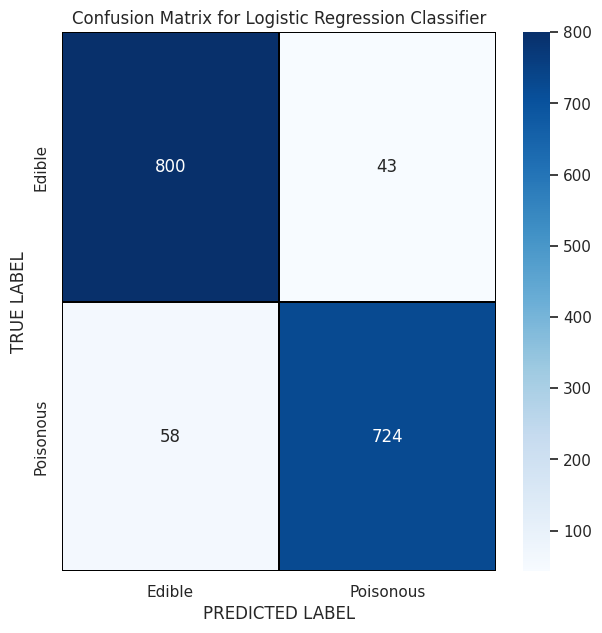

In [54]:
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

Using Logistic Regression the prediction accuracy is high but not perfect. Lets use a more nuanced model.

# 2. SVM

In [55]:
svm= SVC(random_state=42, gamma="auto") # support vector machine classifier object
svm.fit(X_train_new, y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test_new, y_test)*100, 2)))

Test Accuracy: 100.0%


SVM classifier classification report

In [56]:
y_pred_svm = svm.predict(X_test_new)
print("SVM Classifier report: \n\n", classification_report(y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



SVM classifier confusion matrix

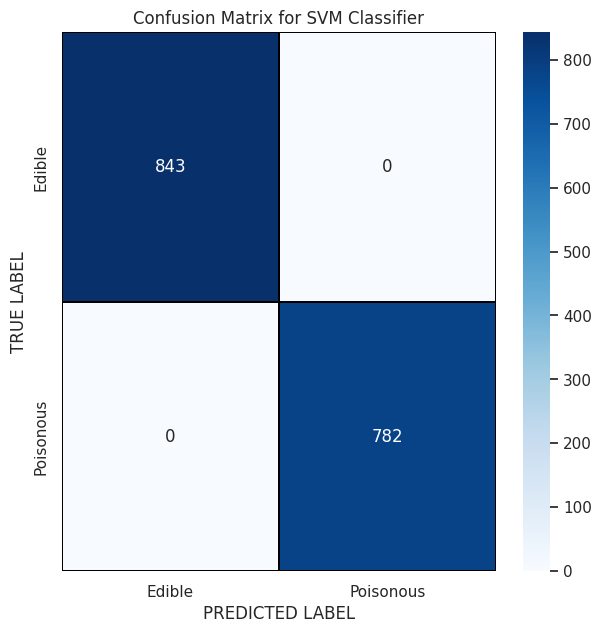

In [57]:
cm = confusion_matrix(y_test, y_pred_svm)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

SVM classifier has 100% prediction accuracy.

# 3. Decision Tree

In [58]:
dt = DecisionTreeClassifier()
dt.fit(X_train_new, y_train)

DecisionTreeClassifier()

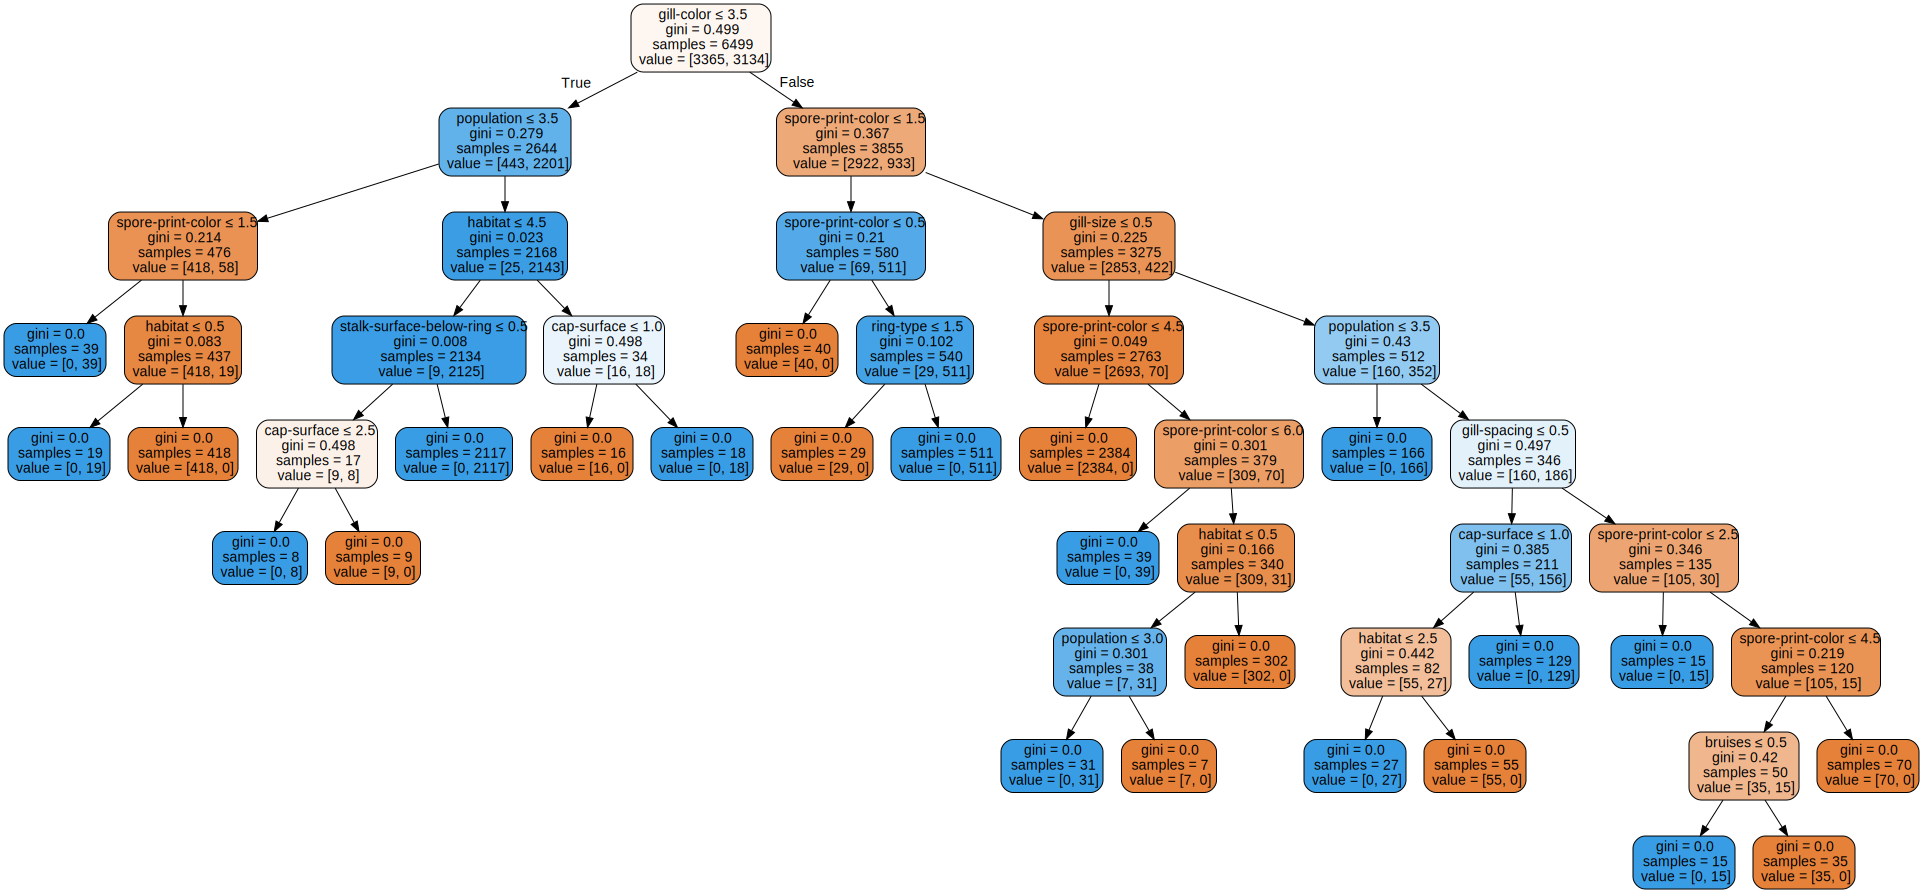

In [59]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=X_train_new.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

So the most important feature in the dataset is gill-color.

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.


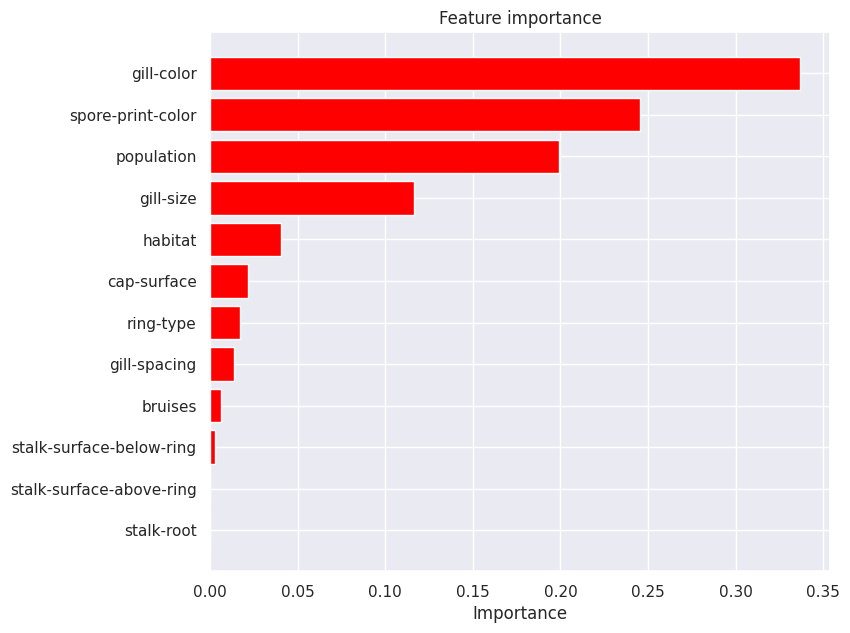

In [60]:
features_list = X_train_new.columns.values
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(8,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
plt.show()

Decision tree classification report

In [61]:
y_pred_dt = dt.predict(X_test_new)

In [62]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, y_pred_dt))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [63]:
print("Test Accuracy: {}%".format(round(dt.score(X_test_new, y_test)*100, 2)))

Test Accuracy: 100.0%


Decision Tree confusion matrix

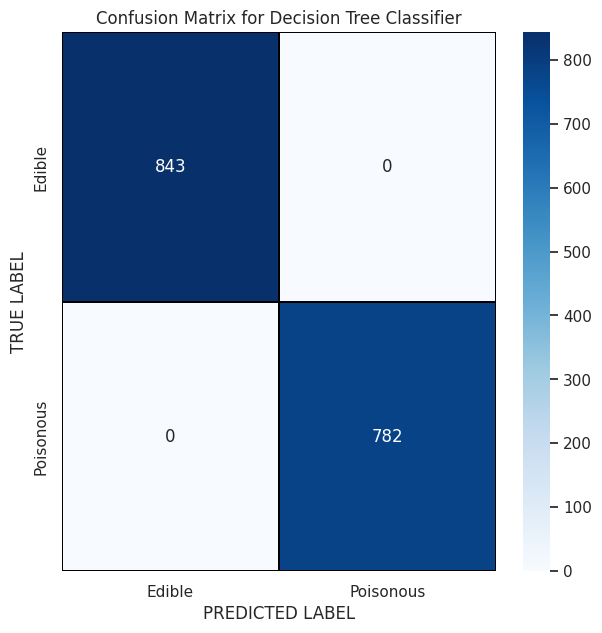

In [64]:
cm = confusion_matrix(y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

So this model predicts with nearly 100 % accuracy. 

#4. Random Forest

In [65]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_new, y_train)

print("Test Accuracy: {}%".format(round(rf.score(X_test_new, y_test)*100, 2)))

Test Accuracy: 100.0%


Random forest classification report

In [66]:
y_pred_rf = rf.predict(X_test_new)
print("Random Forest Classifier report: \n\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Random forest confusion matrix

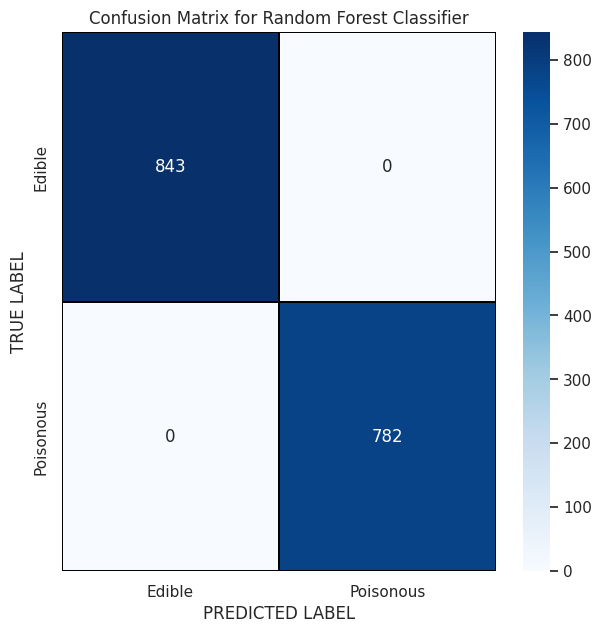

In [67]:
cm = confusion_matrix(y_test, y_pred_rf)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
plt.show()

Random forest also gives a prediction accuracy of 100%.

#5. KNN

In [68]:
# initializing
best_Kvalue = 0
best_score = 0

# looping over n_neighbor parameter value 
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_new, y_train)
    if knn.score(X_test_new, y_test) > best_score:
        best_score = knn.score(X_train_new, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


KNN classification report

In [69]:
y_pred_knn = knn.predict(X_test_new)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



KNN confusion matrix

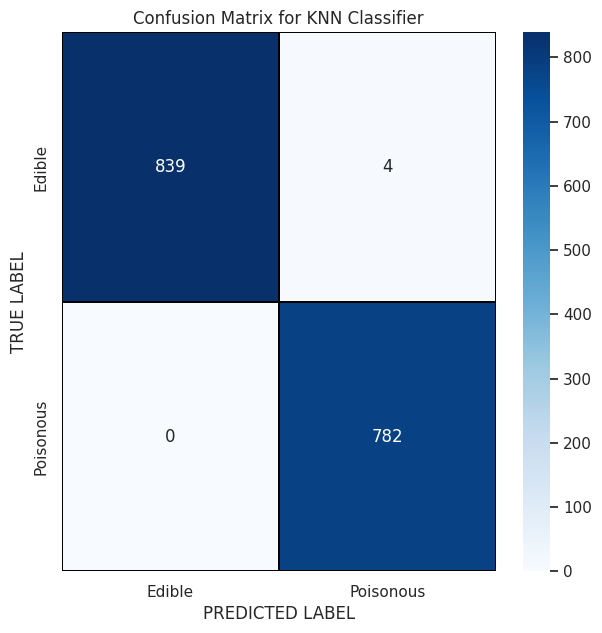

In [70]:
cm = confusion_matrix(y_test, y_pred_knn)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

KNN does not give perfect 100% prediction accuracy.

#6. Naive Bayes

In [71]:
nb = GaussianNB()
nb.fit(X_train_new, y_train)

print("Test Accuracy: {}%".format(round(nb.score(X_test_new, y_test)*100, 2)))

Test Accuracy: 91.38%


Naive Bayes classification report

In [72]:
y_pred_nb = nb.predict(X_test_new)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.89      0.95      0.92       843
           1       0.94      0.88      0.91       782

    accuracy                           0.91      1625
   macro avg       0.92      0.91      0.91      1625
weighted avg       0.92      0.91      0.91      1625



Naive Bayes confusion matrix

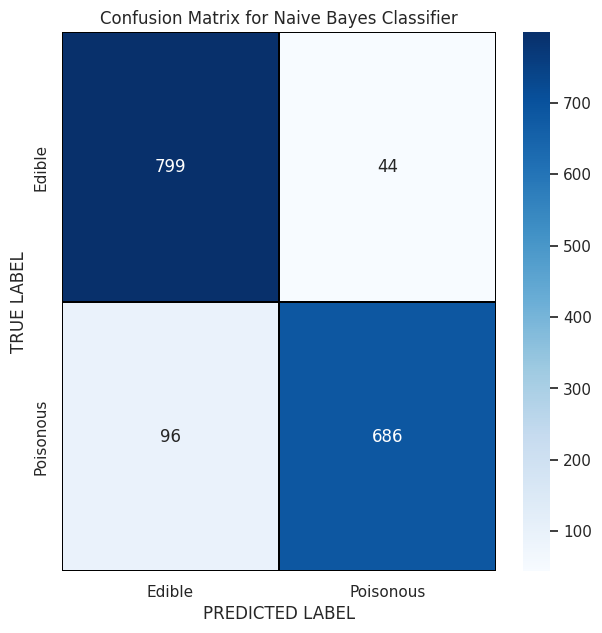

In [73]:
cm = confusion_matrix(y_test, y_pred_nb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

Naive Bayes does not give good prediction accuracy.

# 7. XGBoost Classifier

In [74]:
xgbc = XGBClassifier()
xgbc.fit(X_train_new, y_train)
print("Test Accuracy: {}%".format(round(xgbc.score(X_test_new, y_test)*100, 2)))

Test Accuracy: 100.0%


XGBoost classification report

In [75]:
y_pred_xgbc = xgbc.predict(X_test_new)
print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_xgbc))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



XGBoost confusion matrix

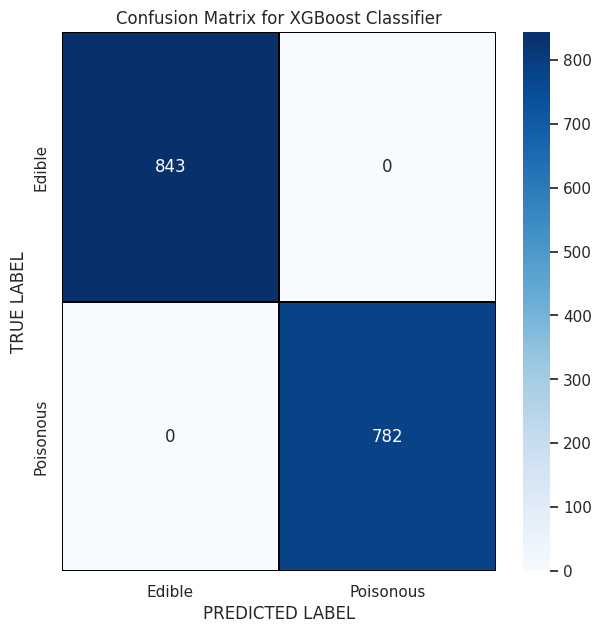

In [76]:
cm = confusion_matrix(y_test, y_pred_xgbc)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

XGBoost has 100% prediction accuracy.

# Conclusion:
Models having perfect 100% accuracy are: XGBoost, Decision tree, Random forest and SVM.

XGB models show better performance for the training phase and comparable performance for the testing phase when compared to SVM models. Besides accuracy, XGB has higher computation speed than SVM.  

Finally, XGBoost model is chosen.